<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/Car_Price_Prediction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicles Dataset
So, this dataset basically contains information about different used cars.
I'll be mainly focusing on predicting the price through various machine learning (Regression) models .

**Let's read and understand the data**,
**Importing the required libraires**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings

pd.set_option("display.max_rows", 100, "display.max_columns", 50) # Ensures that rows of a DataFrame are displayed without truncation and Ensures that required columns are displayed till the set limit.
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignores only FutureWarnings but will still display warnings (like performance or logical issues).

In [ ]:
# Loading the dataset
df = pd.read_csv("car data.csv")

In [ ]:
print("Shape of df: ", df.shape)
df.head()

Shape of df:  (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info() # Checking for any cleaning needed for the dataset(df)
# Looks like there are no null values in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Lets find some numerical data stats about the df.
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Dropping the missing value(if any)
df.dropna() # Looks like our dataset doesn't have any null values.
# df.info()
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# Let's Calculate the age of the car and make a new column in our dataset for that.
from datetime import datetime
df['Age_Years'] = datetime.now().year - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
# Dropping the year column since we don't need that col. anymore.
df.drop('Year', axis=1, inplace=True)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
# Renaming some of the columns for readability.
rename_dict = {
    'Selling_Price': 'Selling_Price(lacs)',
    'Present_Price': 'Present_Price(lacs)',
    'Owner': 'Past_Owners'
}

df.rename(columns=
          {k: v for k, v in rename_dict.items()
          if k in df.columns},
          inplace=True
)

In [ ]:
df.head()
# df['Seller_Type'].unique()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age_Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


# Exploratory Data Analysis(EDA)

- Univariate(One-variable) Analysis

In [ ]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age_Years'],
      dtype='object')

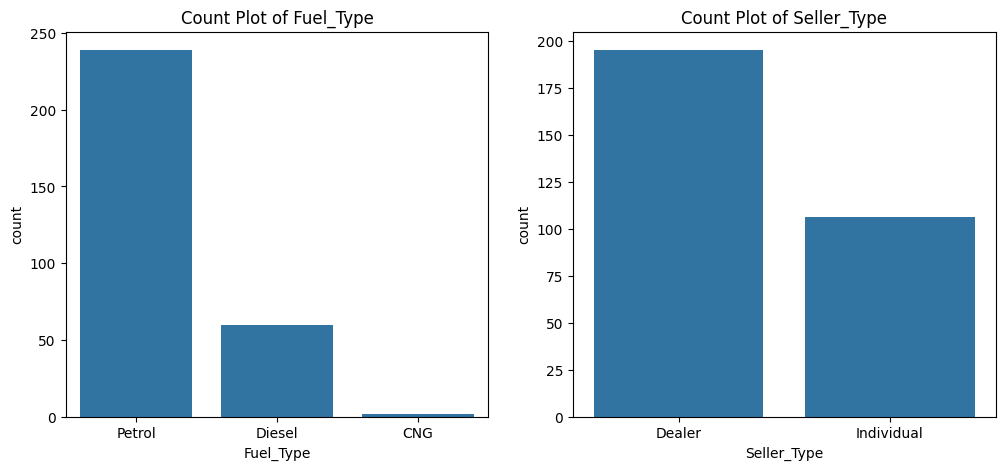

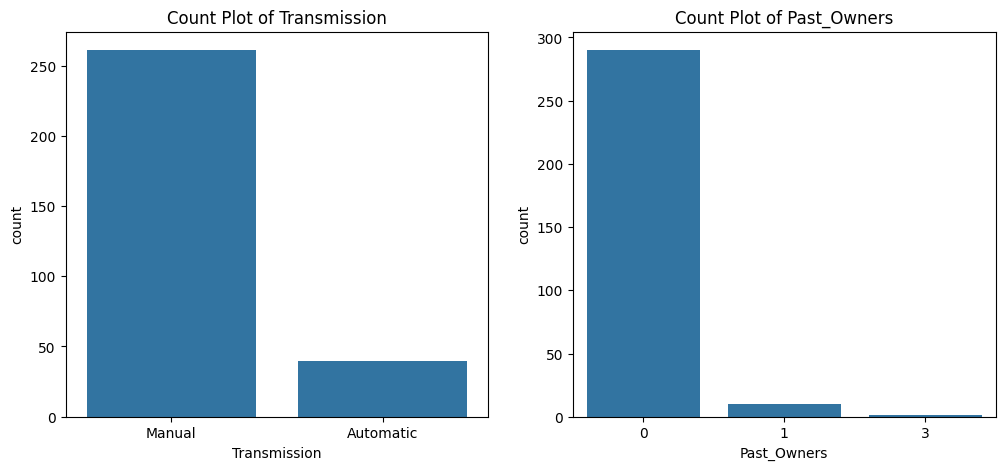

In [ ]:
# Categorical Columns - Cols which consists of multiple categories/Classes.
Categ_Cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']

for i in range(0, len(Categ_Cols), 2): # Loop through every two elements.
    # print(df[Categ_Cols[i]].unique())

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x = Categ_Cols[i], data=df, ax=axes[0])
    axes[0].set_title(f"Count Plot of {Categ_Cols[i]}")

    if i + 1 < len(Categ_Cols):
        sns.countplot(x = Categ_Cols[i+1], data=df, ax=axes[1])
        axes[1].set_title(f"Count Plot of {Categ_Cols[i+1]}")


    plt.show()


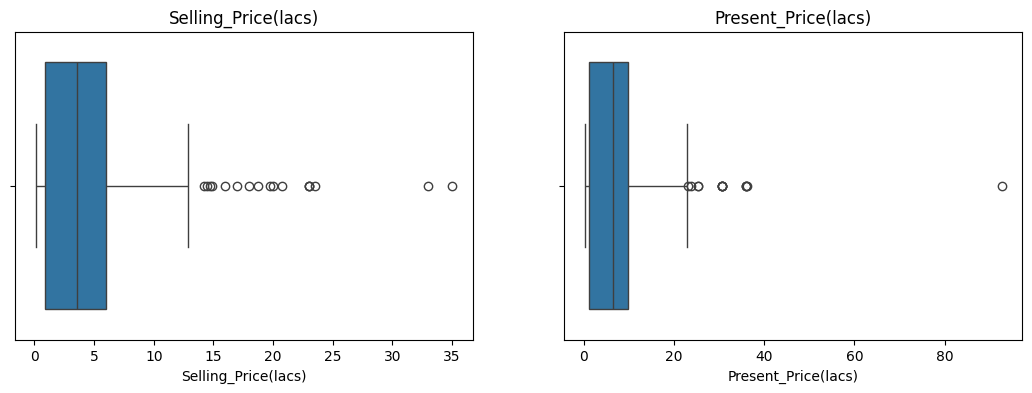

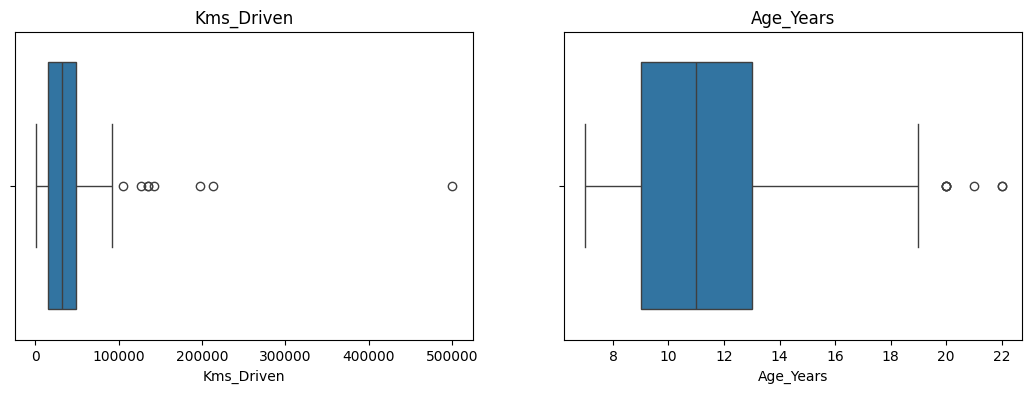

In [ ]:
# Numerical Cols - Cols consisting of numbers.
num_cols = ['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Age_Years']

for i in range(0, len(num_cols), 2):  # Loop through every two elements
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))

    sns.boxplot(x=num_cols[i], data=df, ax=axes[0])
    axes[0].set_title(num_cols[i])

    if i + 1 < len(num_cols):  # Ensure index is within range
        sns.boxplot(x=num_cols[i+1], data=df, ax=axes[1])
        axes[1].set_title(num_cols[i+1])

    plt.show()


# Removing Outliers


In [ ]:
# Present_Price outliers
# df["Present_Price(lacs)"].describe()
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]
# If you want to remove the outliers from your dataset you can use the below code,
# but i am keeping them for now.
# df = df[df_main['Present_Price(lacs)'] <= df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age_Years
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [ ]:
# Selling_Price Outliers
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]
# Removal is the same as `"Present_Price"`

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age_Years
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [ ]:
# Kms_Driven oultiers
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age_Years
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,20
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,15
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,17


**Multi-Variable Analysis**

In [ ]:
# Visualizing the correlation matrix using a heatmap:
""" Common correlation values:
+1 - Strong positive correlation
-1 - Strong negative correlation
 0 - No correlation """
# sns.heatmap(df.corr(), annot=True, cmap="RdBu")

# df.corr()['Selling_Price(lacs)'].sort_values(ascending=False)

' Common correlation values:\n+1 - Strong positive correlation\n-1 - Strong negative correlation\n 0 - No correlation '

In [ ]:
numerical_features = df.select_dtypes(include=np.number)  # Select numerical columns
correlation_matrix = numerical_features.corr()  # Calculate correlation for numerical features only
selling_price_corr = correlation_matrix['Selling_Price(lacs)'].sort_values(ascending=False)
print(selling_price_corr)

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age_Years             -0.236141
Name: Selling_Price(lacs), dtype: float64


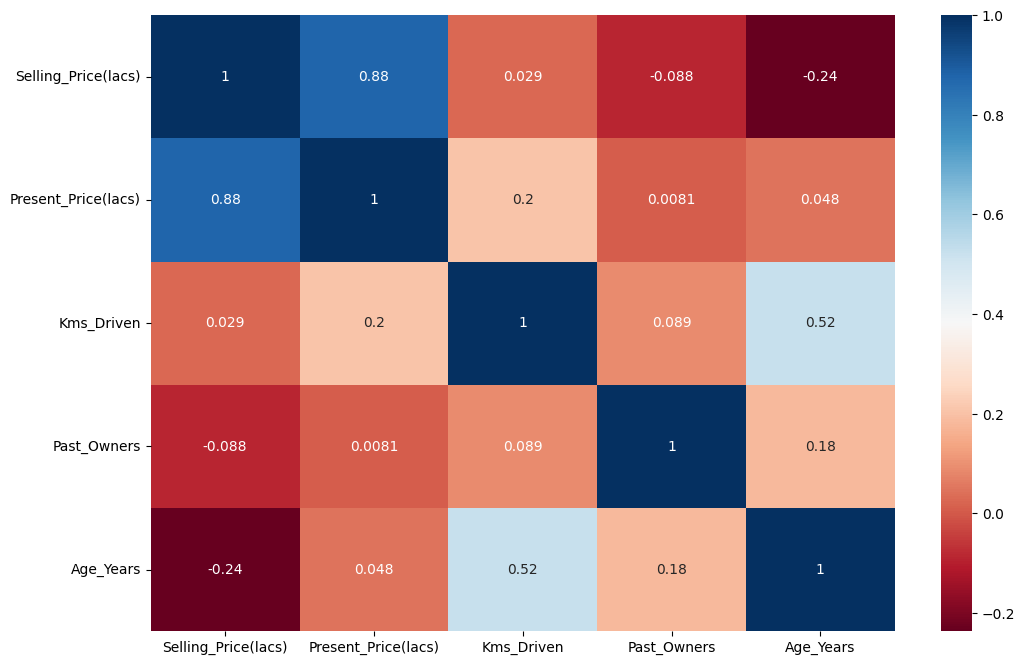

In [ ]:
# Now plotting the correlation of numerical values only
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu")
plt.show()

In [ ]:
# Computing the mean Selling_Price(lacs) for each combination,
#  of Seller_Type and Fuel_Type.

df.pivot_table(values='Selling_Price(lacs)', index='Seller_Type', columns='Fuel_Type')

# """ What this means :
#    e.g; Dealer sells CNG cars at an average of 3.1(lacs),
#    while Individual sellers sells Diesel cars at an average of 16(lacs)
# """



Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [ ]:
# Mean of Price for each of seller type and the transmission of the Car.
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type',
 columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


# Data Preparation

Creating Dummies for categorical data

In [ ]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age_Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
df.drop(labels='Car_Name', axis=1, inplace=True)

In [ ]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
# performs one-hot encoding on categorical columns,
# Converts categorical columns into binary (0/1).
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


# Spliting Data (Train and Test)

In [ ]:
# Separating feature matrix and its target variable.
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

# Getting Shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training data size: 240 samples
Testing data size: 61 samples
X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


# Creating Models and Evaluating them

Models i'll apply:

1: Linear Regression

2: Lasso Regression

3: Ridge Regression

4: Random Forest Regression

5: Gradient Boosting Regression

In [ ]:
# Function for model performance and cross validation
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating a fucntion for evaluating and predicting the model.
CV = []
R2_train = []
R2_test = []

def car_prediction_model(model):
  # Model Training
  model.fit(X_train, y_train)

  # Model Evaluation
  # R2 score of train set
  y_pred_train = model.predict(X_train)
  R2_train_model = r2_score(y_train, y_pred_train)
  R2_train.append(round(R2_train_model, 2))

  # R2 score of test set
  y_pred_test = model.predict(X_test)
  R2_test_model = r2_score(y_test, y_pred_test)
  R2_test.append(round(R2_test_model, 2))

  # R2 mean of train set using Cross-Validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)
  cv_mean = round(cv_scores.mean(), 2)
  CV.append(cv_mean)

  # Now, Printing the results
  print("Training R2-Score: ", round(R2_train_model, 2))
  print("Testing R2-Score: ", round(R2_test_model, 2))
  print("Cross-Validation R2-Score: ", cv_mean)
  print("\n")


  # Now, Plotting the graphs based on data.
  # Residual Plot
  # Make it small as scatter plot
  fig, ax = plt.subplots(1, 2, figsize=(10, 4))
  ax[0].set_title("Residual Plot (Train Data)")
  # Using histplot for a simple histogram
  sns.histplot((y_train - y_pred_train), kde=True, ax=ax[0], bins=20, color='blue', edgecolor='black')
  ax[0].set_xlabel("y_train - y_pred_train")

  # Y_test vs Y_train scatter plot
  ax[1].set_title("Predicted vs Actual (Test Data)")
  ax[1].scatter(x=y_test, y=y_pred_test)
  ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
  ax[1].set_xlabel("y_test")
  ax[1].set_ylabel("y_pred_test")


  plt.show()

# 1: Linear Regression

Training R2-Score:  0.88
Testing R2-Score:  0.86
Cross-Validation R2-Score:  0.84




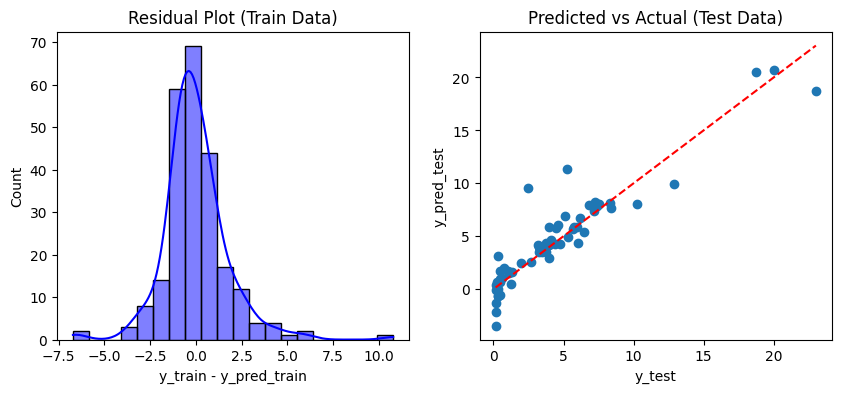

In [ ]:
# 1: Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_prediction_model(lr)

# 2: Lasso Regression (L1 Regularization)

Loss=∑(Y−
Y
^
 )
2
 +λ∑∣β
i
​
 ∣

In [ ]:
# Importing required libs for lasso.
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3, 3, num=14) # Generates 14 values spaced b/w 10^-3 and 10^3.

# HyperParameter Tuning.
ls_random_search = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Training R2-Score:  0.88
Testing R2-Score:  0.87
Cross-Validation R2-Score:  0.84




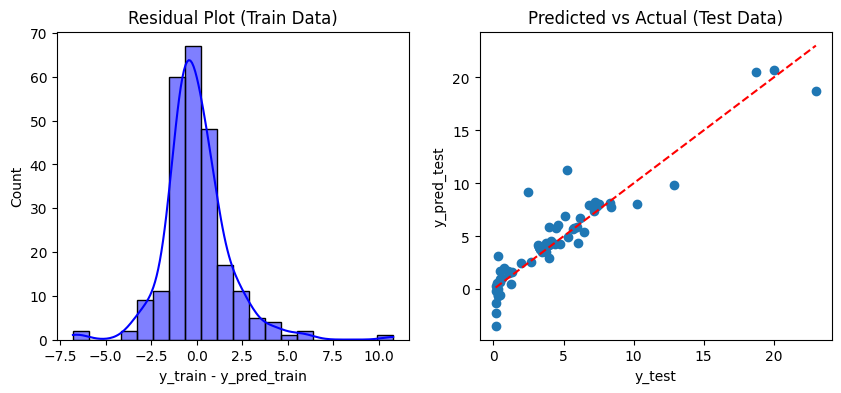

In [ ]:
car_prediction_model(ls_random_search)

# Ridge Regression (L2 Penalty)

Loss=∑(Y−
Y
^
 )
2
 +λ∑β
i
2
​


Training R2-Score:  0.88
Testing R2-Score:  0.86
Cross-Validation R2-Score:  0.84




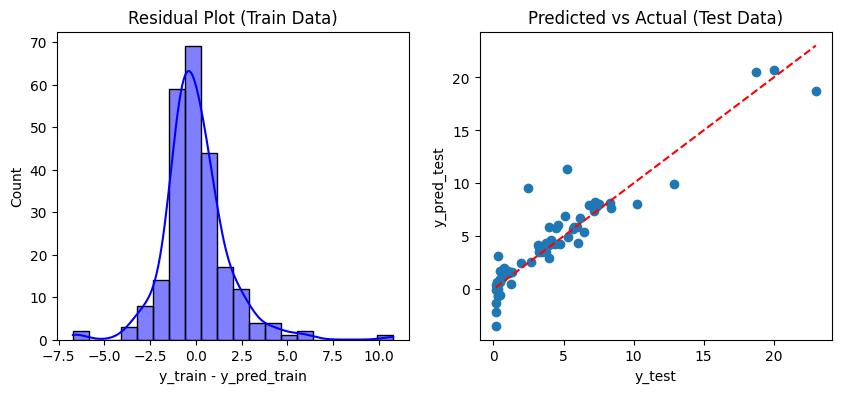

In [ ]:
# Importing Required Libs. for Ridge.
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object.
rg = Ridge()

# Choosing the range for `alpha`
alpha = np.logspace(-3, 3, num=14)

# HyperParameter Tuning.

# Creating RandomizedSearchCV to find the best estimator of hyperParameter.
rg_random_search = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))


# Calling the prediction fucntion for the Ridge Regression
car_prediction_model(rg_random_search)

# Random Forest

In [ ]:
# Bringing in Random Forest Regression Model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initializing the Random Forest Regression Model.
rf = RandomForestRegressor()

# Defining Hyperparameters for Tuning
n_estimators = list(range(500, 1000, 100))  # No. of decision trees in a forest.

# Max levels each tree can grow.
max_depth = list(range(4, 9, 4))

# Minimum number of samples required to split an internal node
min_samples_to_split = list(range(4, 9, 2))  # Controlling when a node should split.

# Minimum samples in a leaf node
min_sample_in_leaf = [1, 2, 5, 7]

# Number of features to consider at each split
max_features = ['sqrt']  # Using `sqrt` can speed up training while keeping performance good.


# Running HyperParameter Tuning.
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_to_split,
    'min_samples_leaf': min_sample_in_leaf,
    'max_features': max_features
}

# finding the best model fit by randomly sampling the different combinations
rf_random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)


Training R2-Score:  0.9
Testing R2-Score:  0.94
Cross-Validation R2-Score:  0.83




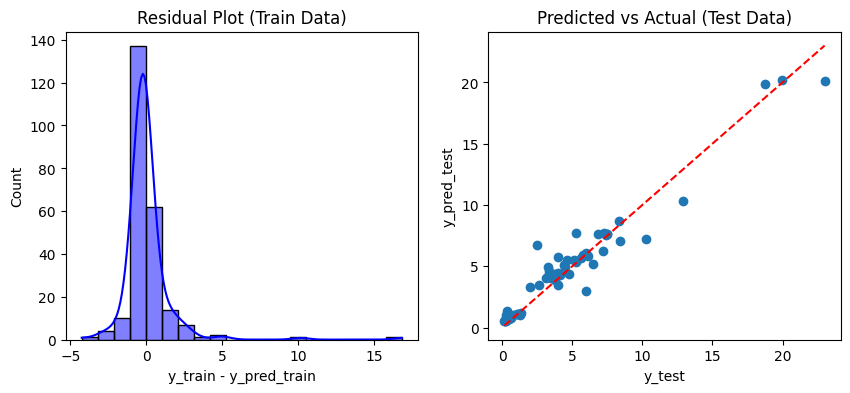

In [ ]:
# Calling the function for  `Random Forest`
car_prediction_model(rf_random_search)

## Gradient Boosting

In [ ]:
# Bringining in GBR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating GBR model object.
gb = GradientBoostingRegressor()

# Rate at which correction is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]

# Number of trees in Gradient Boosting
n_estimators = list(range(500, 1000, 100))

# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))

# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]

# Number of features to be considered at each split
max_features = ['sqrt']

# Hyperparameters dictionary for tuning
param_grid = {
    "learning_rate": learning_rate,
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

gb_random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid)

Training R2-Score:  1.0
Testing R2-Score:  0.89
Cross-Validation R2-Score:  0.84




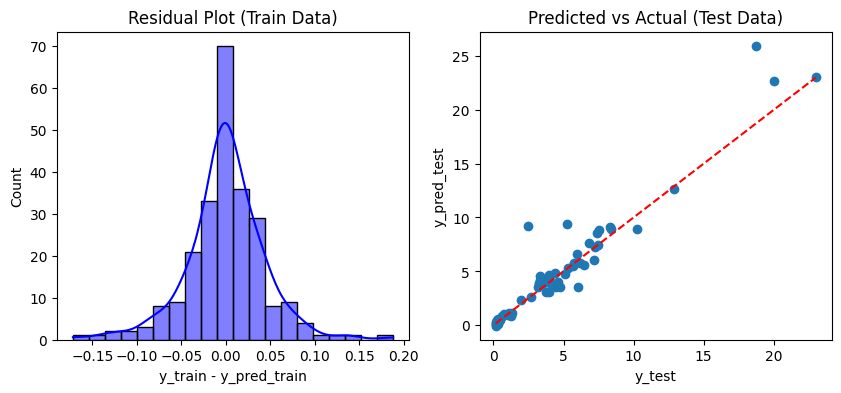

In [ ]:
# Calling the function for 'GBR'
car_prediction_model(gb_random_search)

In [ ]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test})
display(results)

,Model,R Squared(Train),R Squared(Test)
0,LinearRegression,0.88,0.86
1,Ridge,0.88,0.87
2,Lasso,0.88,0.86
3,RandomForestRegressor,0.90,0.94
4,GradientBoostingRegressor,1.00,0.89


In [ ]:
import altair as alt

# Create a melted dataframe for easier plotting
results_melted = results.melt(id_vars=['Model'], var_name='Metric', value_name='R_Squared')

# Create the Altair chart
chart = alt.Chart(results_melted).mark_bar().encode(
    x='R_Squared',
    y=alt.Y('Model', sort='-x'),  # Sort models by R-squared value
    color='Metric'
).properties(title="Model Performance Comparison")

chart

alt.Chart(...)